In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# New Section

In [ ]:
dataset=pd.read_csv('/content/E-commerce Shipping Dataset (4).csv')


In [ ]:
dataset

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [ ]:
dataset.head(10)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
5,6,F,Flight,3,1,162,3,medium,F,12,1417,1
6,7,D,Flight,3,4,250,3,low,F,3,2371,1
7,8,F,Flight,4,1,233,2,low,F,48,2804,1
8,9,A,Flight,3,4,150,3,low,F,11,1861,1
9,10,B,Flight,3,2,164,3,medium,F,29,1187,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


number of features= 12
or (11 if we exclude the ID column);


data points= 10999


In [ ]:
numerical_data = dataset.select_dtypes(include='number')
numerical_features=numerical_data.columns.tolist()
print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

There are 8 numerical features: 

['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']


In [ ]:
categorical_data=dataset.select_dtypes(include= 'object')
categorical_features=categorical_data.columns.tolist()
print(f'There are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

There are 4 categorical features: 

['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']


In [ ]:
print(set(dataset.dtypes))

{dtype('O'), dtype('int64')}


In [ ]:
numerical_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10999.0,5500.000000,3175.282140,1.0,2750.5,5500.0,8249.5,10999.0
Customer_care_calls,10999.0,4.054459,1.141490,2.0,3.0,4.0,5.0,7.0
Customer_rating,10999.0,2.990545,1.413603,1.0,2.0,3.0,4.0,5.0
Cost_of_the_Product,10999.0,210.196836,48.063272,96.0,169.0,214.0,251.0,310.0
Prior_purchases,10999.0,3.567597,1.522860,2.0,3.0,3.0,4.0,10.0
Discount_offered,10999.0,13.373216,16.205527,1.0,4.0,7.0,10.0,65.0
Weight_in_gms,10999.0,3634.016729,1635.377251,1001.0,1839.5,4149.0,5050.0,7846.0
Reached.on.Time_Y.N,10999.0,0.596691,0.490584,0.0,0.0,1.0,1.0,1.0


In [ ]:
categorical_data.describe().T

,count,unique,top,freq
Warehouse_block,10999,5,F,3666
Mode_of_Shipment,10999,3,Ship,7462
Product_importance,10999,3,low,5297
Gender,10999,2,F,5545


In [ ]:
numerical_data.var()

,0
ID,1.008242e+07
Customer_care_calls,1.302999e+00
Customer_rating,1.998274e+00
Cost_of_the_Product,2.310078e+03
Prior_purchases,2.319103e+00
Discount_offered,2.626191e+02
Weight_in_gms,2.674459e+06
Reached.on.Time_Y.N,2.406728e-01


it will be classification


Here the "Reached on time" variable is considered as the target variable where it only has 1 and 0 on respective entries.
this target value means there is variation. it only doesnt predict only 1s or only 0s which could give the perfect accuracy everytime (meaning all the deliveries are accurately done).
as classification requires at least two or more distinct classes (0 or 1), it will be classification as it has 1s and 0s in the target values,
it will not be regression unless we are predicting a continuous value.

In [ ]:
numerical_data.skew()

,0
ID,0.000000
Customer_care_calls,0.391926
Customer_rating,0.004360
Cost_of_the_Product,-0.157117
Prior_purchases,1.681897
Discount_offered,1.798929
Weight_in_gms,-0.249747
Reached.on.Time_Y.N,-0.394257


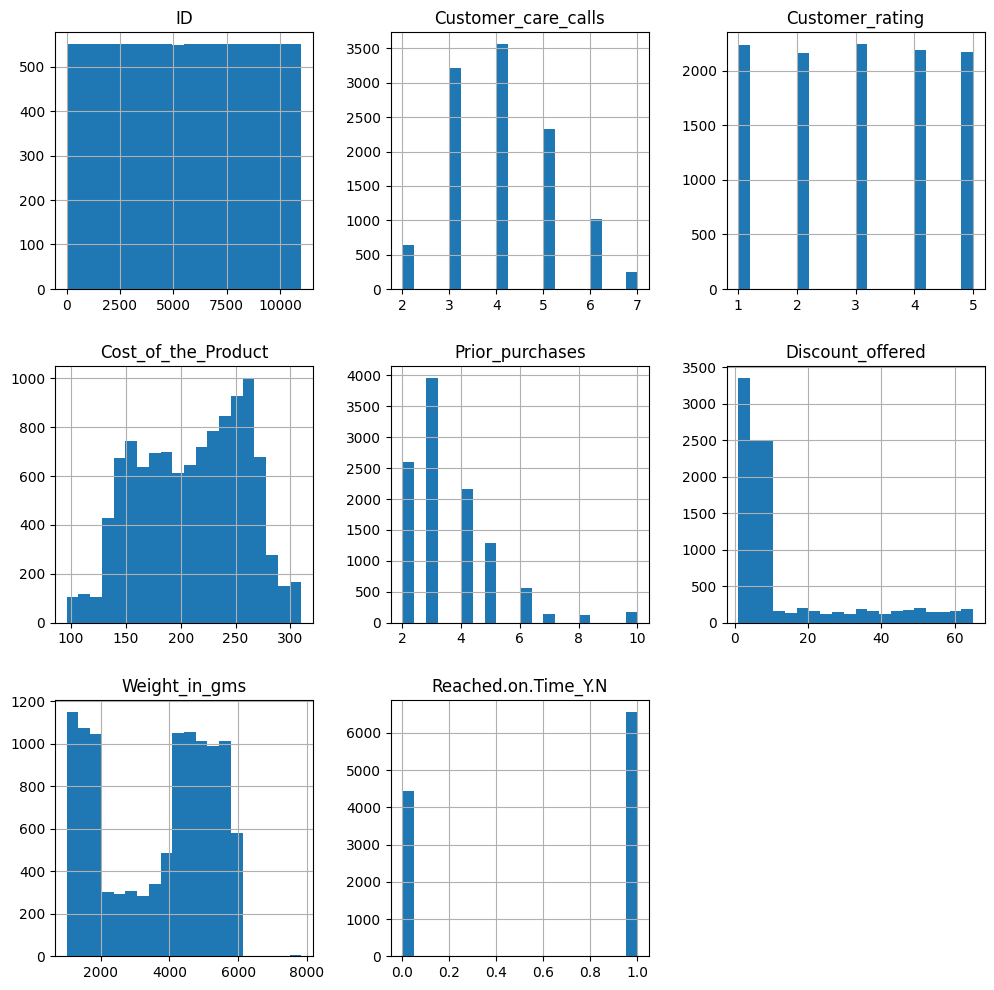

In [ ]:
numerical_data.hist(figsize=(12,12),bins=20)
plt.show()

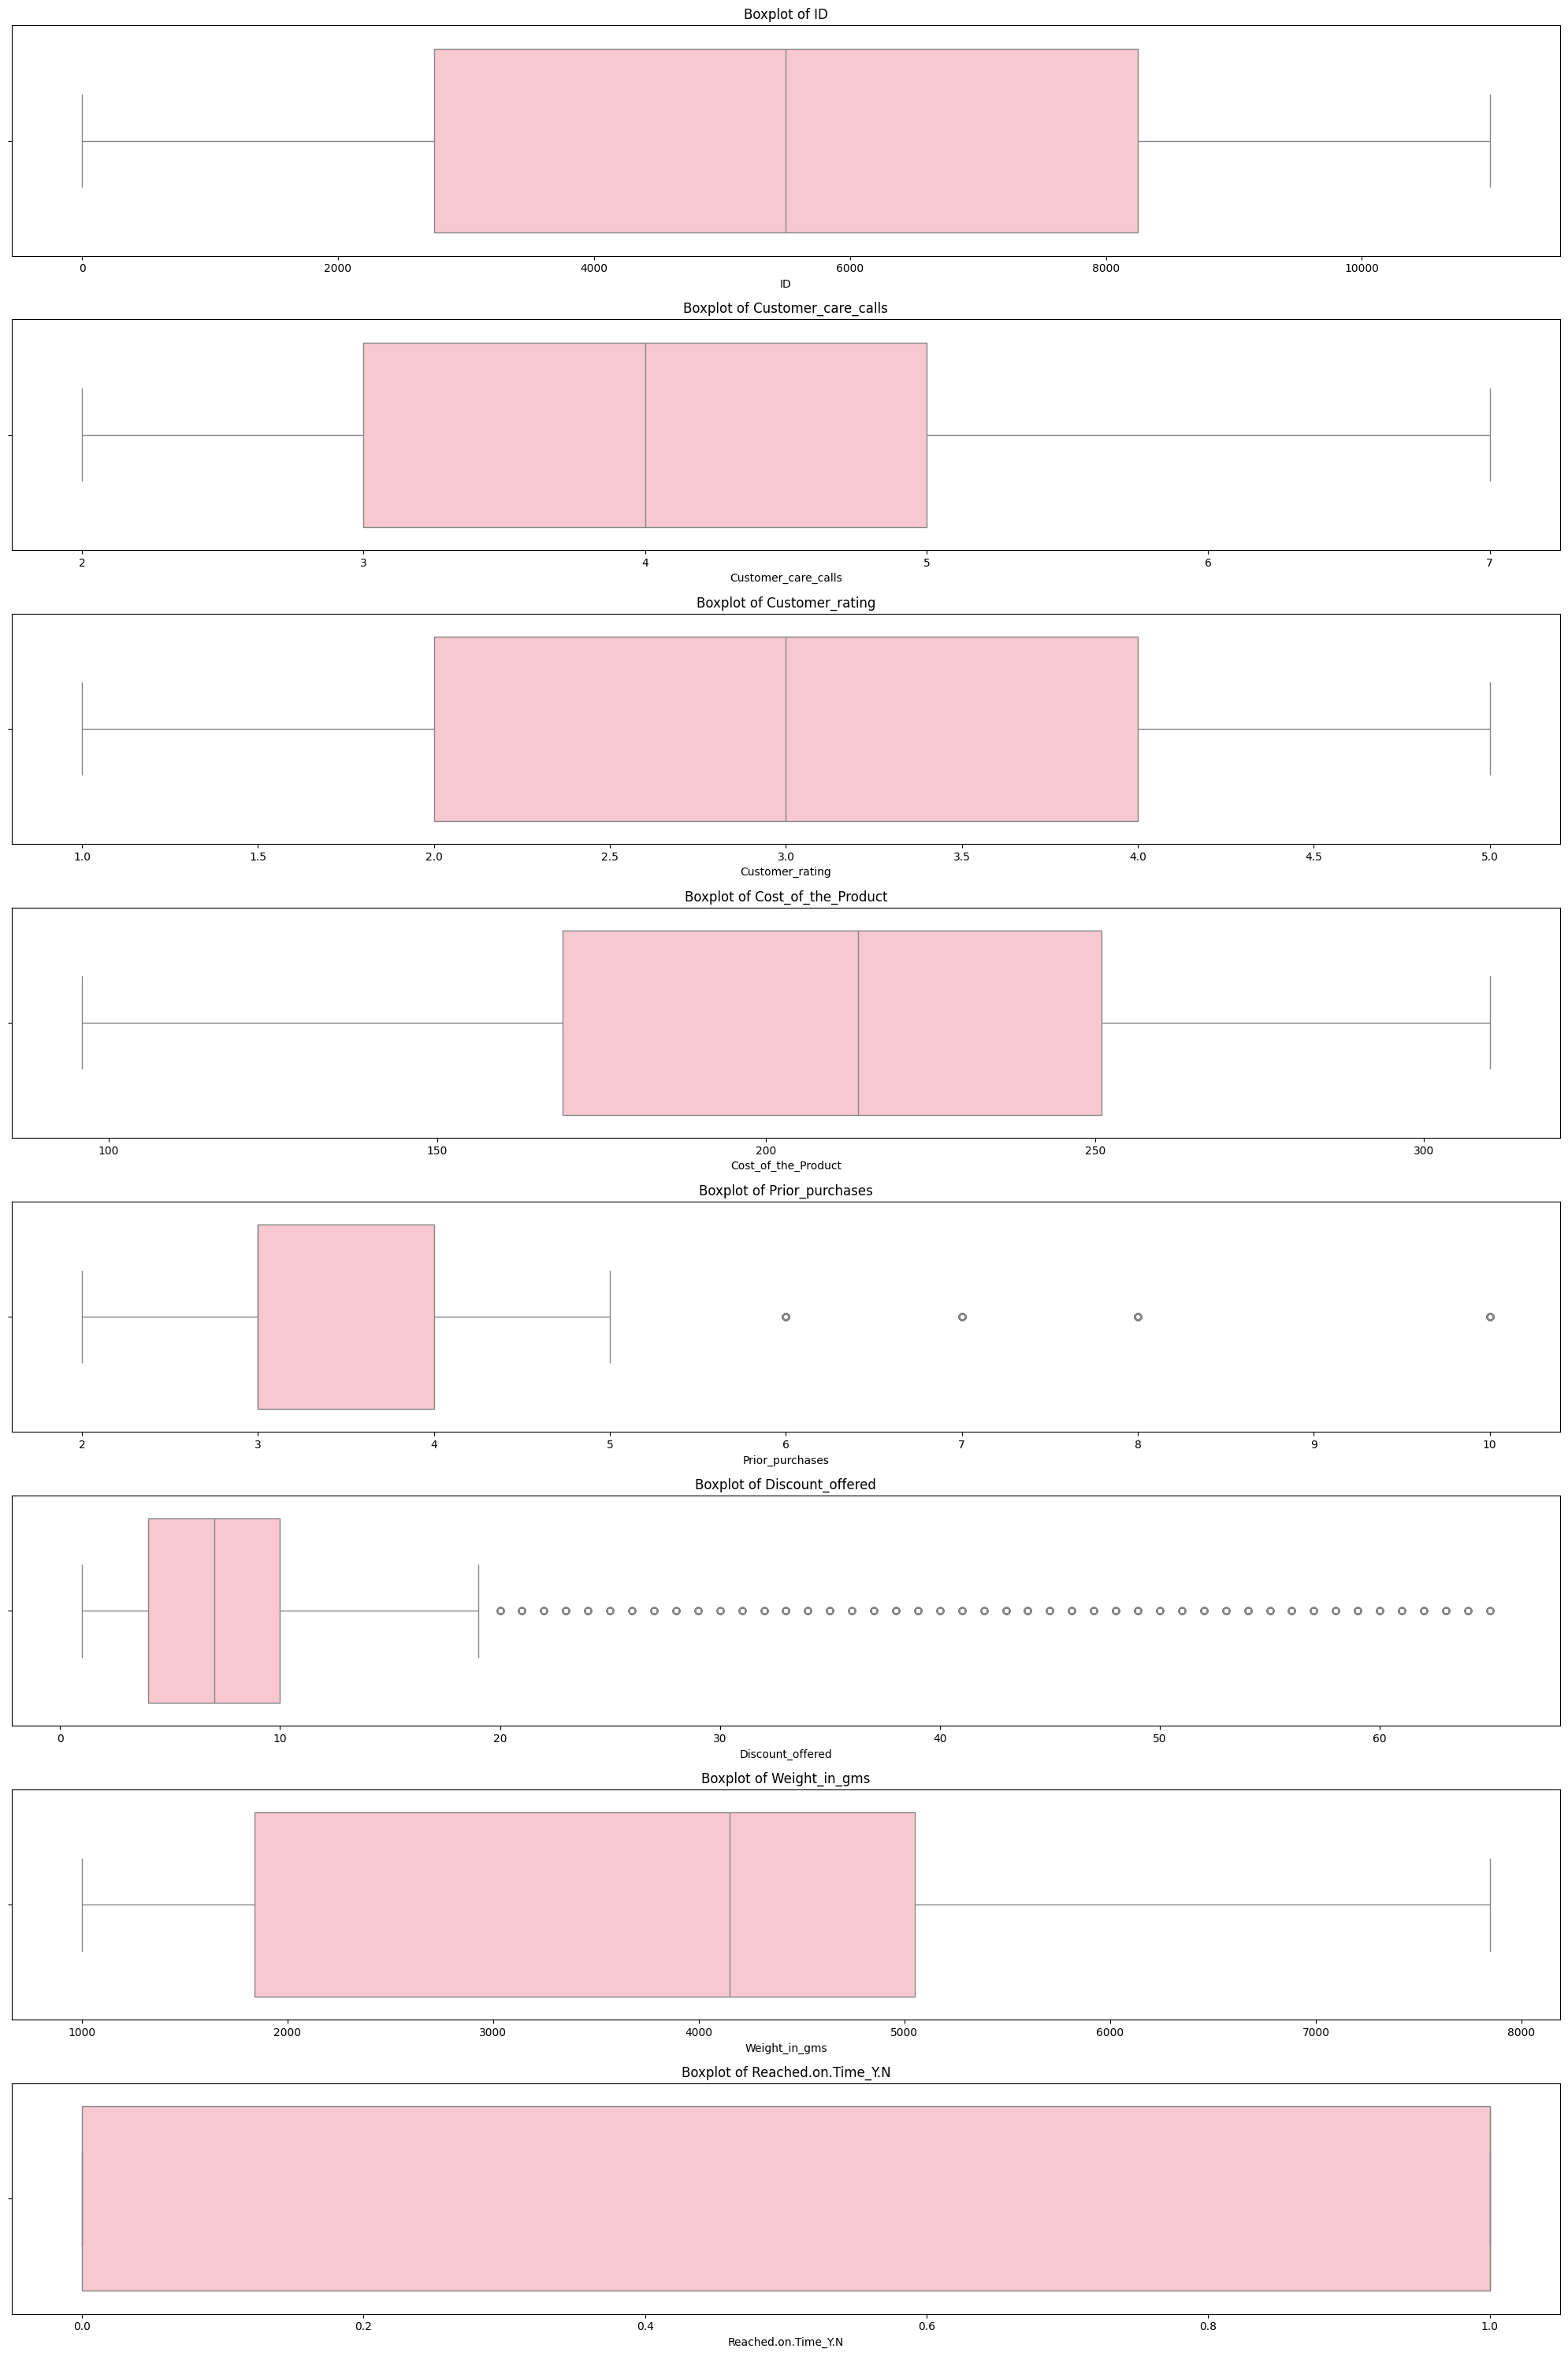

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = dataset.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(20, 30))

for i, col in enumerate(numeric_cols, 1):             #boxplot
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=dataset[col], color='pink')
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.tight_layout()

plt.show()

In [ ]:
numerical_data.nunique()

,0
ID,10999
Customer_care_calls,6
Customer_rating,5
Cost_of_the_Product,215
Prior_purchases,8
Discount_offered,65
Weight_in_gms,4034
Reached.on.Time_Y.N,2


In [ ]:
categorical_data.nunique()

,0
Warehouse_block,5
Mode_of_Shipment,3
Product_importance,3
Gender,2


CLASS IMBALANCE:

here, the output has values 1s in 6563 rows and 0s in 4436 rows. so there is a class imbalance. classes dont have equal number of instances.

In [ ]:
dataset['Reached.on.Time_Y.N'].value_counts()

,count
Reached.on.Time_Y.N,
1,6563
0,4436


REPRESENTATION OF BAR CHART OF N CLASSES

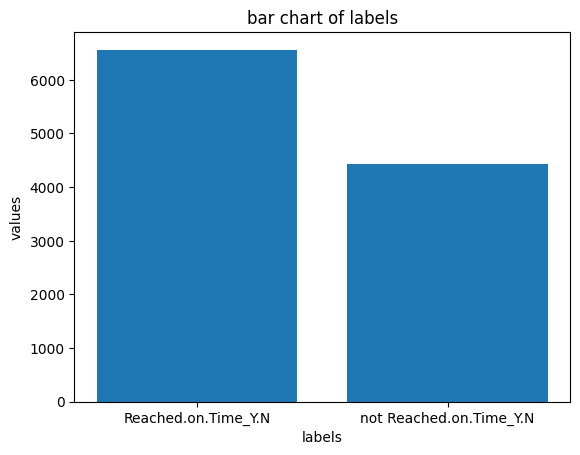

In [ ]:
labels=['Reached.on.Time_Y.N','not Reached.on.Time_Y.N']
values=[6563, 4436]
plt.bar(labels,values)
plt.xlabel('labels')
plt.ylabel('values')
plt.title('bar chart of labels')
plt.show()

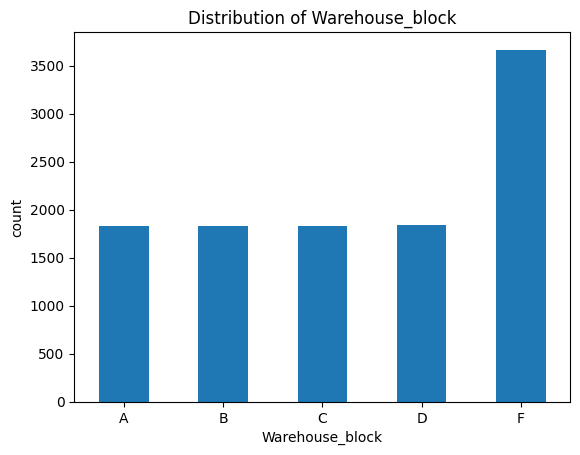

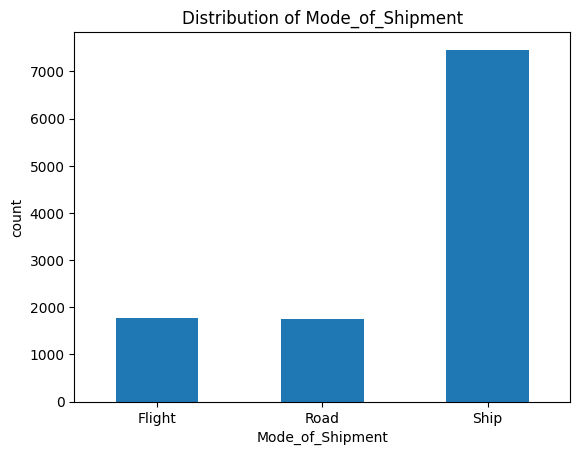

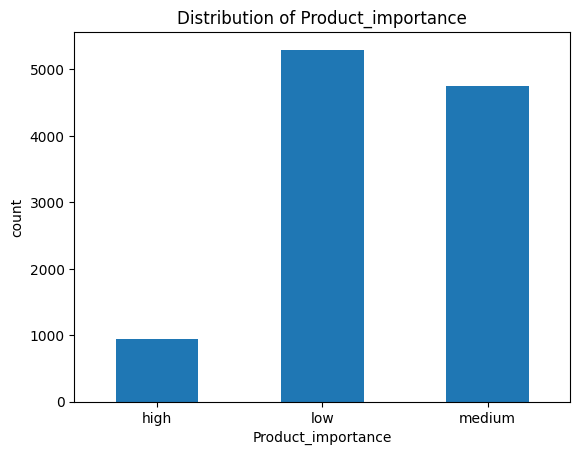

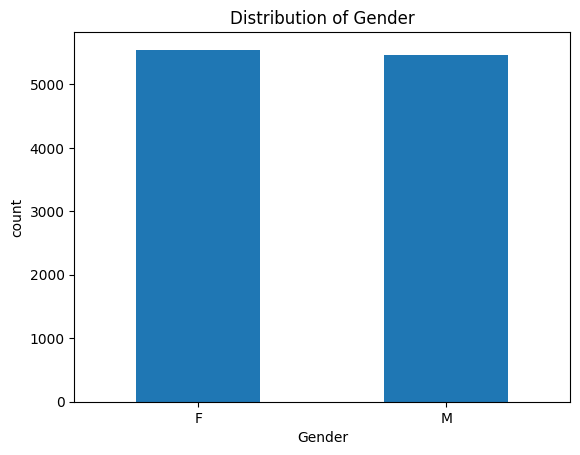

In [ ]:
for col in categorical_features:
    plt.title(f'Distribution of {col}')
    categorical_data[col].value_counts().sort_index().plot(kind='bar', rot=0, xlabel=col,ylabel='count')
    plt.show()

In [ ]:
#correlation matrix
correlation_matrix = numerical_data.corr()
correlation_matrix


,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,1.000000,0.188998,-0.005722,0.196791,0.145369,-0.598278,0.278312,-0.411822
Customer_care_calls,0.188998,1.000000,0.012209,0.323182,0.180771,-0.130750,-0.276615,-0.067126
Customer_rating,-0.005722,0.012209,1.000000,0.009270,0.013179,-0.003124,-0.001897,0.013119
Cost_of_the_Product,0.196791,0.323182,0.009270,1.000000,0.123676,-0.138312,-0.132604,-0.073587
Prior_purchases,0.145369,0.180771,0.013179,0.123676,1.000000,-0.082769,-0.168213,-0.055515
Discount_offered,-0.598278,-0.130750,-0.003124,-0.138312,-0.082769,1.000000,-0.376067,0.397108
Weight_in_gms,0.278312,-0.276615,-0.001897,-0.132604,-0.168213,-0.376067,1.000000,-0.268793
Reached.on.Time_Y.N,-0.411822,-0.067126,0.013119,-0.073587,-0.055515,0.397108,-0.268793,1.000000


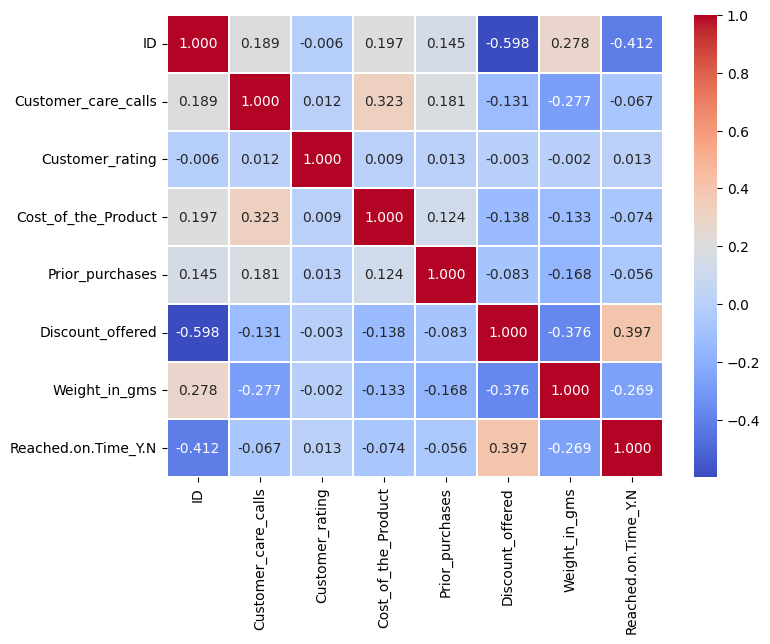

In [ ]:
#heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.3)
plt.show()

In [ ]:
print(dataset.columns.tolist())

['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']


In [ ]:
#target_column='Reached.on.Time_Y.N'

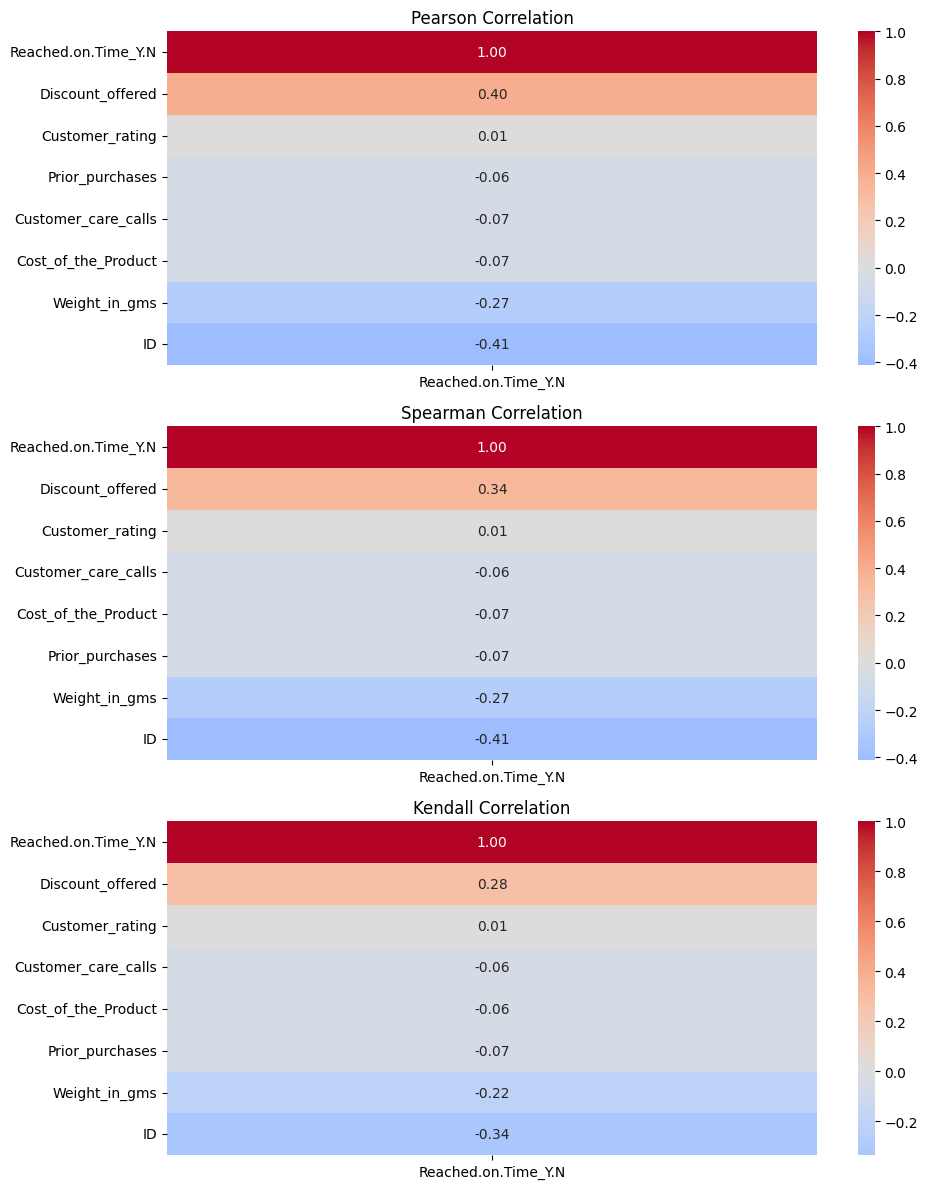

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

target_column='Reached.on.Time_Y.N'
numerical_data = dataset.select_dtypes(include=['int64', 'float64'])
if target_column in dataset.columns:
    numerical_data[target_column] = dataset[target_column]

# correlation plots
fig, ax = plt.subplots(3, 1, figsize=(10, 12))

try:
    # Calculate correlations
    corr1 = numerical_data.corr('pearson')[[target_column]].sort_values(by=target_column, ascending=False)
    corr2 = numerical_data.corr('spearman')[[target_column]].sort_values(by=target_column, ascending=False)
    corr3 = numerical_data.corr('kendall')[[target_column]].sort_values(by=target_column, ascending=False)

    # Plot settings
    ax[0].set_title('Pearson Correlation')
    ax[1].set_title('Spearman Correlation')
    ax[2].set_title('Kendall Correlation')

    sns.heatmap(corr1, ax=ax[0], annot=True, cmap='coolwarm', center=0, fmt=".2f")
    sns.heatmap(corr2, ax=ax[1], annot=True, cmap='coolwarm', center=0, fmt=".2f")
    sns.heatmap(corr3, ax=ax[2], annot=True, cmap='coolwarm', center=0, fmt=".2f")

    plt.tight_layout()
    plt.show()

except KeyError as e:
    print(f"Error: {e}")
    print(f"Available columns in numerical_data: {numerical_data.columns.tolist()}")

AFTER THE CORRELATION TEST WE CAN SAY THAT:

ID has the most negative correlation and Discounted_offer is most positive correlation.
The negative correlation with ID is unusual and warrants investigation
The zero correlation with Customer_rating is surprising and might indicate either that customer satisfaction truly doesn't relate to delivery on time.

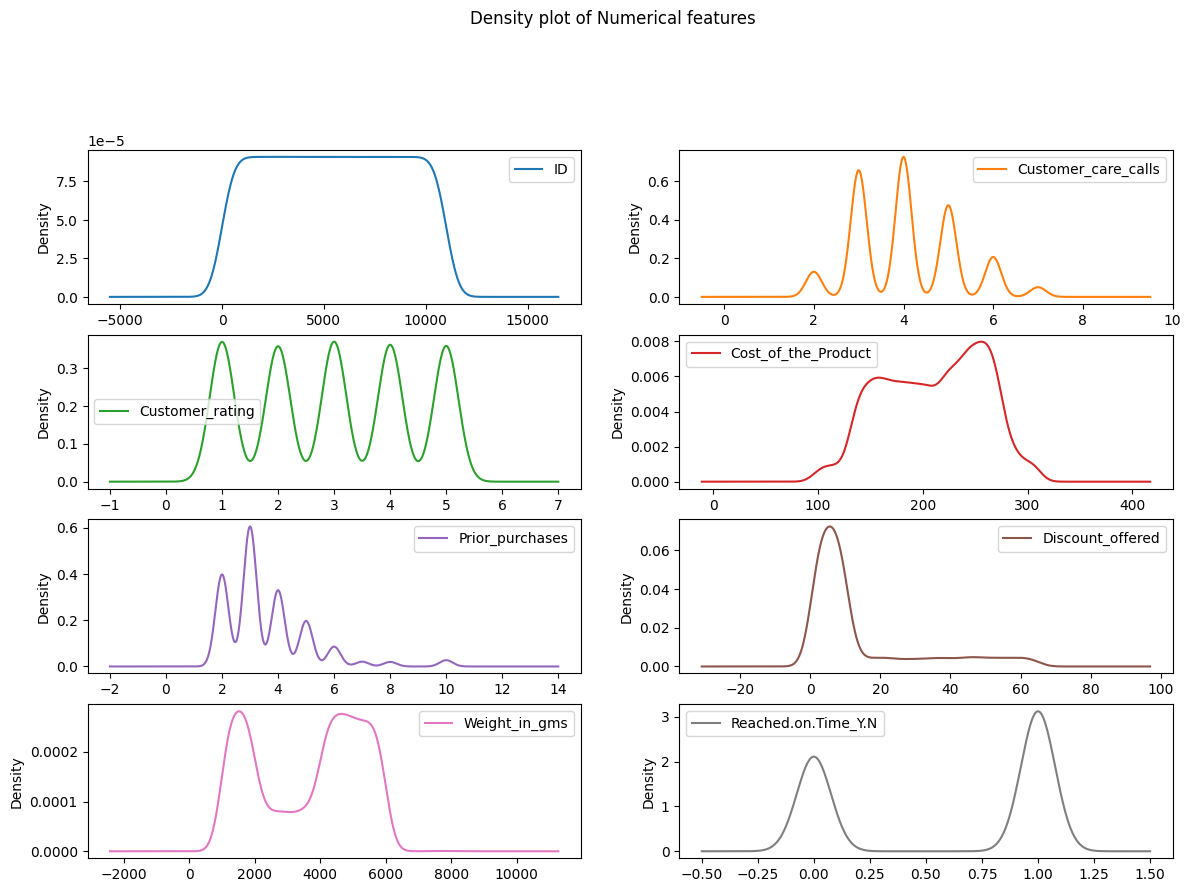

In [ ]:
numerical_data.plot(kind='density',figsize=(14,14),subplots=True,layout=(6,2),title="Density plot of Numerical features",sharex=False)
plt.show()

DATASET PREPROCESSING


FAULTS:

null values and categorical values


SOLUTION:

there is no null values in the columns. so we dont have any solution to find

In [ ]:
#null values
print(dataset.isna().sum())

#categorical values
cat_columns = dataset.select_dtypes(exclude=['number']).columns.tolist()
print(cat_columns)

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64
['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']


In [ ]:
null_columns=dataset.columns[dataset.isna().any()].tolist()
print(null_columns)

[]


FAULTS:

Feature Scaling

SOLUTION:

used normalization and standard scaler


In [ ]:
import numpy as np

numerical_columns = dataset.select_dtypes(include=np.number).columns.tolist()
for col in numerical_columns:
  col_var = np.var(dataset[col])            #variance
  print(f'{col}: {round(col_var,2)}')

ID: 10081500.0
Customer_care_calls: 1.3
Customer_rating: 2.0
Cost_of_the_Product: 2309.87
Prior_purchases: 2.32
Discount_offered: 262.6
Weight_in_gms: 2674215.6
Reached.on.Time_Y.N: 0.24


According to the difference in variance values, feature scalling is needed.

In [ ]:
y=[0,1]
std=np.std(y)                  #standard deviation
mean=np.mean(y)                #mean
print((0-mean)/std)
print((1-mean)/std)

-1.0
1.0


In [ ]:
features=dataset.drop(['Reached.on.Time_Y.N'],axis=1).columns.to_list()        #normalizing every feature except target
print(features)

['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms']


In [ ]:
dataset.head(5)               #without scaling

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
numerical_columns_scale = dataset.select_dtypes(include=np.number).columns.tolist()
if 'Reached.on.Time_Y.N' in numerical_columns_scale:
    numerical_columns_scale.remove('Reached.on.Time_Y.N')        # using all features except target feature
if 'ID' in numerical_columns_scale:
    numerical_columns_scale.remove('ID')

dataset[numerical_columns_scale] = scaler.fit_transform(dataset[numerical_columns_scale])
dataset.head(5)            # After scaling

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,-0.047711,-0.700755,-0.690722,-0.372735,low,F,1.889983,-1.468240,1
1,2,F,Flight,-0.047711,1.421578,0.120746,-1.029424,low,M,2.815636,-0.333893,1
2,3,A,Flight,-1.799887,-0.700755,-0.565881,0.283954,low,M,2.136824,-0.159002,1
3,4,B,Flight,-0.923799,0.006689,-0.711529,0.283954,medium,M,-0.208162,-1.502484,1
4,5,C,Flight,-1.799887,-0.700755,-0.545074,-0.372735,medium,F,2.013404,-0.703244,1


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

if 'Reached.on.Time_Y.N' in numerical_columns_scale:
    numerical_columns_scale.remove('Reached.on.Time_Y.N')        # using all features except target feature
if 'ID' in numerical_columns_scale:
    numerical_columns_scale.remove('ID')

if numerical_columns_scale:
    dataset[numerical_columns_scale] = scaler.fit_transform(dataset[numerical_columns_scale])

dataset_1=dataset[dataset['Reached.on.Time_Y.N']==1]     #dataset balancing
dataset_0=dataset[dataset['Reached.on.Time_Y.N']==0]
reduce_1=dataset_1.sample(n=4436,replace=False)
dataset=pd.concat([reduce_1,dataset_0])
dataset=dataset.sample(frac=1)   # dataset shuffle


In [ ]:
dataset['Reached.on.Time_Y.N'].value_counts()

,count
Reached.on.Time_Y.N,
1,4436
0,4436


WE NEED TO BALANCE THE DATASET

In [ ]:
reduce_1=dataset_1.sample(n=4436,replace=False)
dataset=pd.concat([reduce_1,dataset_0])
dataset=dataset.sample(frac=1)   # dataset shuffle
dataset['Reached.on.Time_Y.N'].value_counts()

,count
Reached.on.Time_Y.N,
1,4436
0,4436


In [ ]:
dataset.shape

(8872, 12)

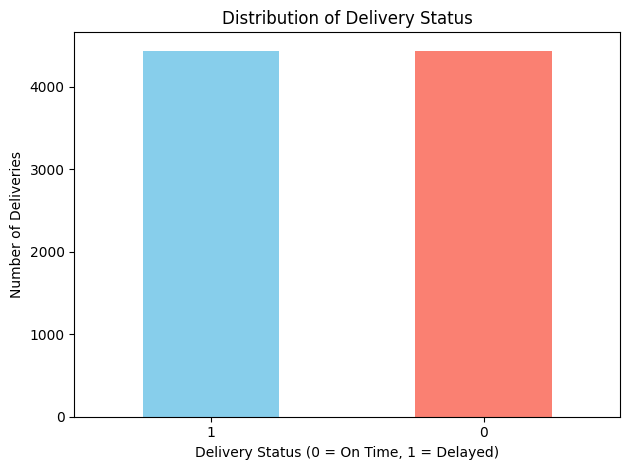

In [ ]:
# bar chart for the balanced classes


import matplotlib.pyplot as plt

value_counts = dataset['Reached.on.Time_Y.N'].value_counts()
value_counts.plot(kind='bar', color=['skyblue', 'salmon'])

plt.xlabel('Delivery Status (0 = On Time, 1 = Delayed)')
plt.ylabel('Number of Deliveries')
plt.title('Distribution of Delivery Status')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()


DATASET SPLITTING

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

x = dataset.drop(columns=['Reached.on.Time_Y.N','ID'])
y = dataset['Reached.on.Time_Y.N']

non_numeric_cols = x.select_dtypes(exclude=[np.number]).columns.tolist()

if non_numeric_cols:
   for col in non_numeric_cols:
     x[col + '_encoded'] = x[col].astype('category').cat.codes
   x = x.drop(columns=non_numeric_cols)
   print(f"Successfully label encoded and dropped: {non_numeric_cols}")
else:
    print("No non-numeric columns found in x.")


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1, stratify=y)





Successfully label encoded and dropped: ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']


MODEL TRAINING

In [ ]:
!pip install tensorflow
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping


Naive Bayes Results:
Accuracy: 0.70
Precision: 1.00
Recall: 0.40
AUC Score: 0.71


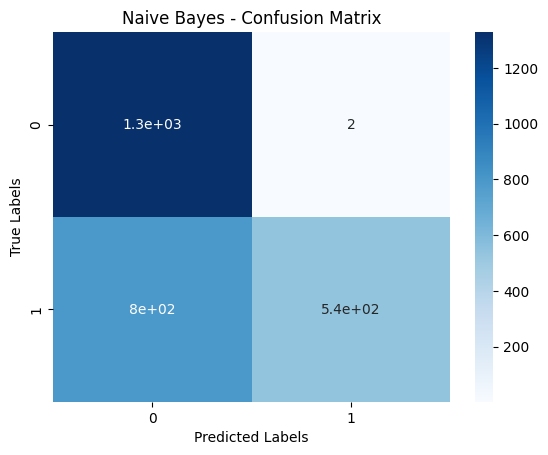


Logistic Regression Results:
Accuracy: 0.68
Precision: 0.78
Recall: 0.51
AUC Score: 0.71


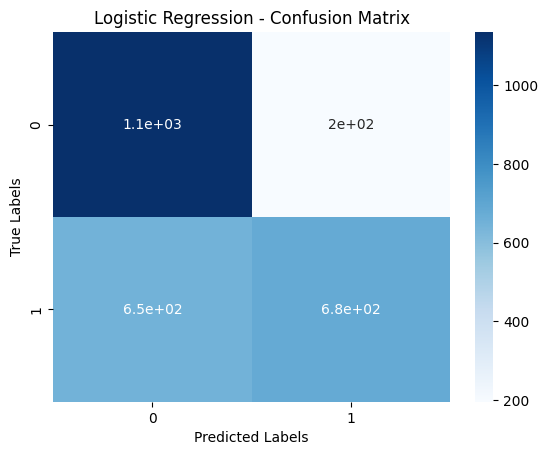

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)                                   # Training (test set)
nb_preds = nb_model.predict(x_test)
nb_probs = nb_model.predict_proba(x_test)[:, 1]

# precision
nb_accuracy = accuracy_score(y_test, nb_preds)
nb_precision = precision_score(y_test, nb_preds)
nb_recall = recall_score(y_test, nb_preds)
nb_auc = roc_auc_score(y_test, nb_probs)

print("Naive Bayes Results:")
print(f"Accuracy: {nb_accuracy:.2f}")
print(f"Precision: {nb_precision:.2f}")
print(f"Recall: {nb_recall:.2f}")
print(f"AUC Score: {nb_auc:.2f}")

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, nb_preds), annot=True, cmap='Blues')
plt.title("Naive Bayes - Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(x_train, y_train)                                     # Training
logreg_preds = logreg.predict(x_test)
logreg_probs = logreg.predict_proba(x_test)[:, 1]

# precision
logreg_accuracy = accuracy_score(y_test, logreg_preds)
logreg_precision = precision_score(y_test, logreg_preds)
logreg_recall = recall_score(y_test, logreg_preds)
logreg_auc = roc_auc_score(y_test, logreg_probs)

print("\nLogistic Regression Results:")
print(f"Accuracy: {logreg_accuracy:.2f}")
print(f"Precision: {logreg_precision:.2f}")
print(f"Recall: {logreg_recall:.2f}")
print(f"AUC Score: {logreg_auc:.2f}")

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, logreg_preds), annot=True, cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()






In [ ]:
# Neural networks

model  = Sequential()
model.add(Dense(8, input_shape=(x_train.shape[1],),activation='relu'))
model.add(BatchNormalization())
model.add(Dense(4, activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

early_stopping = EarlyStopping(monitor='val_accuracy',patience=10,restore_best_weights=True)
model.fit(x_train,y_train,epochs=250,validation_data=(x_test,y_test), callbacks=[early_stopping])
accuracy = model.evaluate(x_test,y_test)[1]
print(f"Model accuracy is: {accuracy}")

nn_preds = model.predict(x_test)
nn_preds_classes = (nn_preds > 0.5).astype("int32")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161 (644.00 B)

 Trainable params: 145 (580.00 B)

 Non-trainable params: 16 (64.00 B)

Epoch 1/250
195/195 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.4967 - loss: 0.7757 - val_accuracy: 0.5980 - val_loss: 0.6745
Epoch 2/250
195/195 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6093 - loss: 0.6693 - val_accuracy: 0.6416 - val_loss: 0.6376
Epoch 3/250
195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6398 - loss: 0.6310 - val_accuracy: 0.6458 - val_loss: 0.5946
Epoch 4/250
195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6468 - loss: 0.5937 - val_accuracy: 0.6597 - val_loss: 0.5749
Epoch 5/250
195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6600 - loss: 0.5634 - val_accuracy: 0.6582 - val_loss: 0.5623
Epoch 6/250
195/195 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.6558 - loss: 0.5736 - val_accuracy: 0.6642 - val_loss: 0.5578
Epoch 7/250
195/195 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6718 - loss: 0.5533 - val_accuracy: 0.6675 - val_loss: 0.5492
Epoch 8/250
195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6720 - loss: 0.5480 - va

Recall: 0.44
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
AUC Score: 0.73
Precision: 0.94


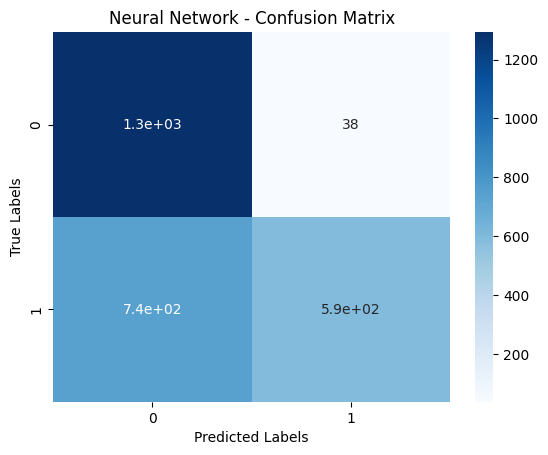

84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [ ]:
# Confusion matrix

from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
nn_preds_classes = (nn_preds > 0.5).astype("int32")
nn_recall = recall_score(y_test, nn_preds_classes)
print(f"Recall: {nn_recall:.2f}")
nn_probs = model.predict(x_test).flatten()
nn_auc = roc_auc_score(y_test, nn_probs)
print(f"AUC Score: {nn_auc:.2f}")
nn_precision = precision_score(y_test, nn_preds_classes)
print(f"Precision: {nn_precision:.2f}")

sns.heatmap(confusion_matrix(y_test, nn_preds_classes), annot=True, cmap='Blues')
plt.title("Neural Network - Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# For ROC curve, we need probabilities
nn_probs = model.predict(x_test).flatten() # Flatten to match shape expected by roc_curve

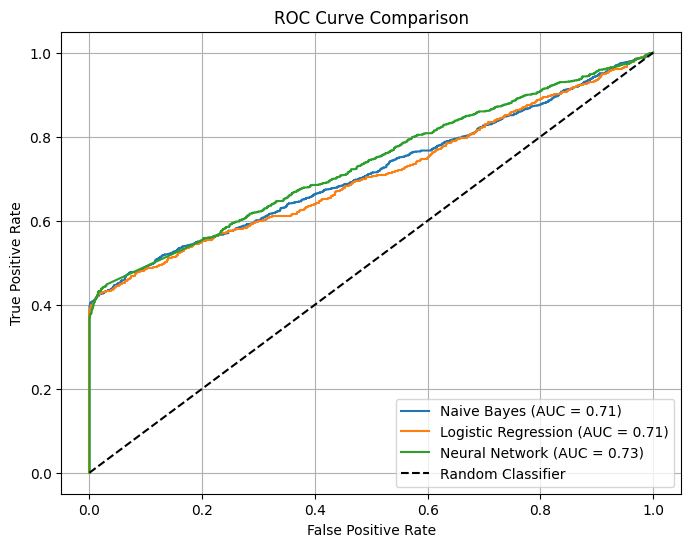

In [ ]:
# ROC curves
from sklearn.metrics import roc_curve
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_probs)
fpr_lr, tpr_lr, _ = roc_curve(y_test, logreg_probs)
fpr_nn, tpr_nn, _ = roc_curve(y_test, nn_probs)

nb_auc = roc_auc_score(y_test, nb_probs)
nn_auc = roc_auc_score(y_test, nn_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {nb_auc:.2f})')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {logreg_auc:.2f})')
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {nn_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()